# ProDS 실기 문제 복습

## 문제 1

In [ ]:
# =============================================================================
# 구분자 : comma(“,”), 4,572 Rows, 5 Columns, UTF-8 인코딩
# 
# 글로벌 전자제품 제조회사에서 효과적인 마케팅 방법을 찾기
# 위해서 채널별 마케팅 예산과 매출금액과의 관계를 분석하고자
# 한다.
# 컬 럼 / 정 의  /   Type
# TV   /     TV 마케팅 예산 (억원)  /   Double
# Radio / 라디오 마케팅 예산 (억원)  /   Double
# Social_Media / 소셜미디어 마케팅 예산 (억원)  / Double
# Influencer / 인플루언서 마케팅
# (인플루언서의 영향력 크기에 따라 Mega / Macro / Micro / 
# Nano) / String

# SALES / 매출액 / Double
# =============================================================================

In [1]:
# 패키지 호출
import pandas as pd
import numpy as np

In [2]:
# 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/Bootcamp/python/python/ProDs/Dataset/DataSet_01.csv'
data1 = pd.read_csv(csvFile, encoding = 'euc-kr')
data1.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [3]:
# 데이터의 정보 확인
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   TV            4562 non-null   float64
 1   Radio         4568 non-null   float64
 2   Social_Media  4566 non-null   float64
 3   Influencer    4572 non-null   object 
 4   Sales         4566 non-null   float64
dtypes: float64(4), object(1)
memory usage: 178.7+ KB


In [4]:
# 컬럼명 확인
data1.columns

Index(['TV', 'Radio', 'Social_Media', 'Influencer', 'Sales'], dtype='object')

### sklearn  패키지 사용 시 주의점
- 기본적으로 numpy 구조 사용
- 수치형 데이터만 입력
- 행렬 곱 연산 수행하기 위해 2D 구조가 되어야 함
- 결측치가 없어야 함


### statsmodels 패키지 사용 시 주의점
- 기본적으로 Dataframe 구조 사용

In [ ]:
# =============================================================================
# 1. 데이터 세트 내에 총 결측값의 개수는 몇 개인가? (답안 예시) 23
# =============================================================================

In [5]:
data1.head()

,TV,Radio,Social_Media,Influencer,Sales
0,16.0,6.566231,2.907983,Mega,54.732757
1,13.0,9.237765,2.409567,Mega,46.677897
2,41.0,15.886446,2.913410,Mega,150.177829
3,83.0,30.020028,6.922304,Mega,298.246340
4,15.0,8.437408,1.405998,Micro,56.594181


In [6]:
# 데이터프레임이 갖는 변수와 메서드의 목록 나열
dir(data1)

['Influencer',
 'Radio',
 'Sales',
 'Social_Media',
 'T',
 'TV',
 '_AXIS_LEN',
 '_AXIS_ORDERS',
 '_AXIS_TO_AXIS_NUMBER',
 '_HANDLED_TYPES',
 '__abs__',
 '__add__',
 '__and__',
 '__annotations__',
 '__array__',
 '__array_priority__',
 '__array_ufunc__',
 '__array_wrap__',
 '__bool__',
 '__class__',
 '__contains__',
 '__copy__',
 '__dataframe__',
 '__deepcopy__',
 '__delattr__',
 '__delitem__',
 '__dict__',
 '__dir__',
 '__divmod__',
 '__doc__',
 '__eq__',
 '__finalize__',
 '__floordiv__',
 '__format__',
 '__ge__',
 '__getattr__',
 '__getattribute__',
 '__getitem__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__iadd__',
 '__iand__',
 '__ifloordiv__',
 '__imod__',
 '__imul__',
 '__init__',
 '__init_subclass__',
 '__invert__',
 '__ior__',
 '__ipow__',
 '__isub__',
 '__iter__',
 '__itruediv__',
 '__ixor__',
 '__le__',
 '__len__',
 '__lt__',
 '__matmul__',
 '__mod__',
 '__module__',
 '__mul__',
 '__ne__',
 '__neg__',
 '__new__',
 '__nonzero__',
 '__or__',
 '__pos__',
 '__pow__',
 '__radd__',

In [7]:
# 결측치 확인
data1.isnull()

,TV,Radio,Social_Media,Influencer,Sales
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
4567,False,False,False,False,False
4568,False,False,False,False,False
4569,False,False,False,False,False
4570,False,False,False,False,False


In [8]:
# 컬럼별 결측값 확인
data1.isnull().sum()

TV              10
Radio            4
Social_Media     6
Influencer       0
Sales            6
dtype: int64

In [9]:
# 결측값 개수 확인1
data1.isna().sum().sum()

26

In [10]:
# 결측값 개수 확인2
data1.isnull().sum().sum()

26

In [11]:
# 결측치 위치/보정 확인
# data1의 TV컬럼
data1[data1.TV.isnull()]

,TV,Radio,Social_Media,Influencer,Sales
13,NaN,22.351667,3.031815,Mega,276.165351
26,NaN,34.111674,4.624148,Nano,342.913372
46,NaN,34.859637,7.781417,Mega,318.969784
75,NaN,6.482293,0.866845,Macro,91.177216
99,NaN,7.635819,1.554146,Macro,56.186730
119,NaN,30.470485,6.806919,Micro,336.818690
141,NaN,9.164464,1.096681,Macro,65.259189
163,NaN,38.118424,6.676611,Micro,328.555184
183,NaN,1.287060,0.396179,Macro,56.545293
210,NaN,17.007075,5.199635,Macro,208.816382


In [ ]:
# =============================================================================
# 2. TV, Radio, Social Media 등 세 가지 다른 마케팅 채널의 예산과 매출액과의 상관분석을
# 통하여 각 채널이 매출에 어느 정도 연관이 있는지 알아보고자 한다. 
# - 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수를 소수점 5번째
# 자리에서 반올림하여 소수점 넷째 자리까지 기술하시오. (답안 예시) 0.1234
# =============================================================================

In [12]:
# 시각화 패키지 사용
import seaborn as sns

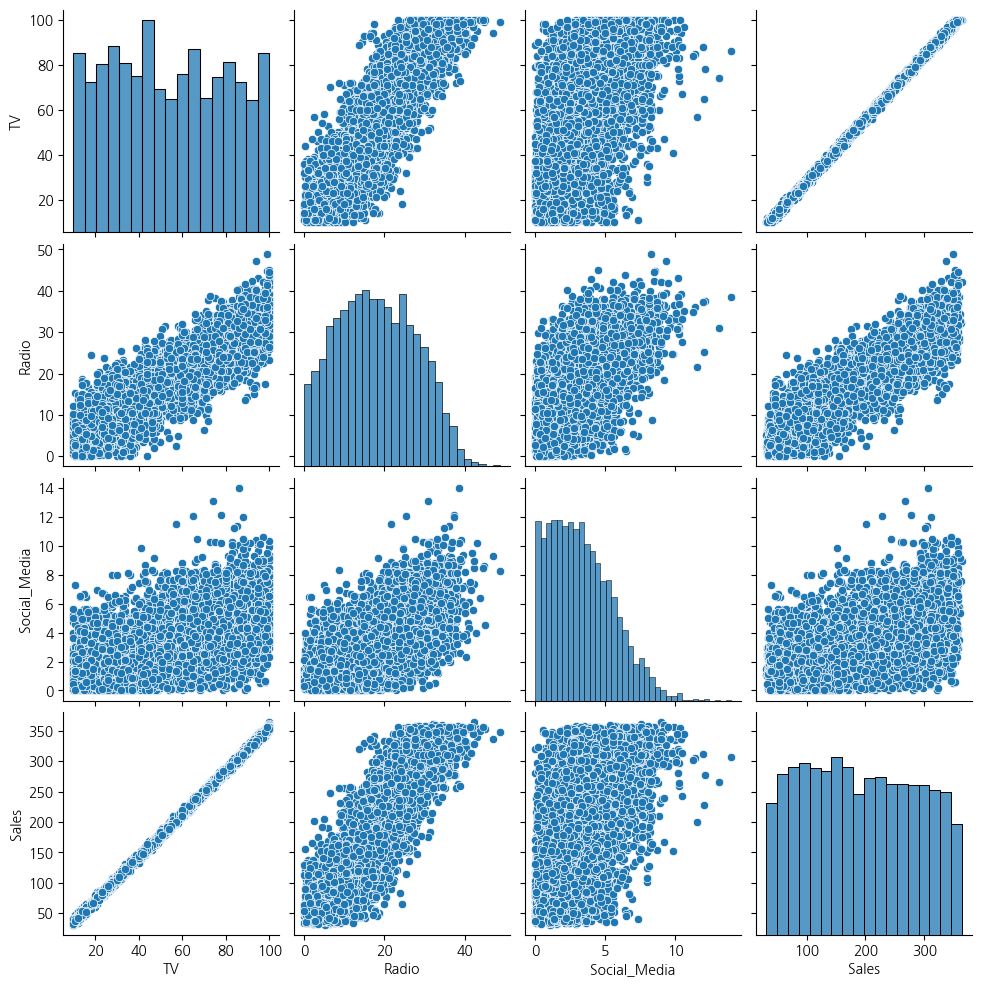

In [13]:
# 상관관계 시각화
sns.pairplot(data1)

In [14]:
# 상관계수
data1.corr()

C:\Users\chunc\AppData\Local\Temp\ipykernel_1588\2115519423.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()


,TV,Radio,Social_Media,Sales
TV,1.000000,0.869460,0.528168,0.999497
Radio,0.869460,1.000000,0.607452,0.869105
Social_Media,0.528168,0.607452,1.000000,0.528906
Sales,0.999497,0.869105,0.528906,1.000000


In [15]:
# 매출액과 가장 강한 상관관계를 가지고 있는 채널의 상관계수
# 열을 선택
# Series형태의 상관계수
data1.corr()['Sales']

C:\Users\chunc\AppData\Local\Temp\ipykernel_1588\3522791907.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()['Sales']


TV              0.999497
Radio           0.869105
Social_Media    0.528906
Sales           1.000000
Name: Sales, dtype: float64

In [16]:
# Sales를 제죄한 변수의 상관계수
data1.corr()['Sales'].drop('Sales')

C:\Users\chunc\AppData\Local\Temp\ipykernel_1588\3777656807.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  data1.corr()['Sales'].drop('Sales')


TV              0.999497
Radio           0.869105
Social_Media    0.528906
Name: Sales, dtype: float64

In [17]:
# Sales를 제죄한 변수의 상관계수 절대값
q1_2 = data1.corr()['Sales'].drop('Sales').abs()

C:\Users\chunc\AppData\Local\Temp\ipykernel_1588\173360187.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1_2 = data1.corr()['Sales'].drop('Sales').abs()


In [18]:
q1_2

TV              0.999497
Radio           0.869105
Social_Media    0.528906
Name: Sales, dtype: float64

In [19]:
# 상관계수의 최대값
q1_2.max()

0.999497444941335

In [20]:
# 소수점 넷째자리 표현
round(q1_2.max(), 4)

0.9995

In [21]:
# 최대값이 있는 위치번호
q1_2.argmax()

0

In [22]:
# 최대값이 있는 인덱스명
q1_2.idxmax()

'TV'

In [23]:
# 상관계수가 높은 상위 2개 변수
q1_2.nlargest(2)

TV       0.999497
Radio    0.869105
Name: Sales, dtype: float64

In [24]:
# 상관계수가 높은 상위 2개 변수의 인덱스
q1_2.nlargest(2).index

Index(['TV', 'Radio'], dtype='object')

In [25]:
# 상관계수가 높은 상위 2개 변수의 값
q1_2.nlargest(2).values

array([0.99949744, 0.86910477])

* numpy함수에서의 버림, 내림, 올림

In [26]:
# 버림(절단)
np.trunc(q1_2.max())
np.trunc(q1_2.max() * 10000) / 10000

0.9994

In [27]:
# 내림
np.floor(q1_2.max())
np.floor(q1_2.max() * 10000) / 10000

0.9994

In [28]:
# 올림
np.ceil(q1_2.max())
np.ceil(q1_2.max() * 10000) / 10000

0.9995

In [29]:
import scipy.stats as sc

In [30]:
# 결측치가 존재, 시행 불가능
sc.personr(data1.TV, data1.Radio)

AttributeError: module 'scipy.stats' has no attribute 'personr'

In [31]:
sc.ttest_ind

<function scipy.stats._stats_py.ttest_ind(a, b, axis=0, equal_var=True, nan_policy='propagate', permutations=None, random_state=None, alternative='two-sided', trim=0)>

In [32]:
# =============================================================================
# 3. 매출액을 종속변수, TV, Radio, Social Media의 예산을 독립변수로 하여 회귀분석을
# 수행하였을 때, 세 개의 독립변수의 회귀계수를 큰 것에서부터 작은 것 순으로
# 기술하시오. 
# - 분석 시 결측치가 포함된 행은 제거한 후 진행하며, 회귀계수는 소수점 넷째 자리
# 이하는 버리고 소수점 셋째 자리까지 기술하시오. (답안 예시) 0.123
# =============================================================================

In [33]:
# 1. 사이킷 런
from sklearn.linear_model import LinearRegression
var_list = ['TV', 'Radio', 'Social_Media']

In [34]:
# 회귀모델
# numpy기반의 알고리즘이므로 결측값 존재 시 실행이 안된다
lm = LinearRegression(fit_intercept = True)
lm.fit(data1[var_list], data1['Sales'])

ValueError: Input X contains NaN.
LinearRegression does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values

In [35]:
# 결측치 제거 후에 수행한다
lm1 = LinearRegression()

q1_3 = data1.dropna()
lm1.fit(q1_3[var_list], q1_3['Sales'])

LinearRegression()

In [36]:
# 회귀계수
lm1.coef_

array([ 3.56256963, -0.00397039,  0.00496402])

In [37]:
# 절편, 상수항
lm1.intercept_

-0.13396305194231672

In [38]:
# Series형태로 변경
q1_3_df1 = pd.Series(lm1.coef_, index = var_list)
q1_3_df1

TV              3.562570
Radio          -0.003970
Social_Media    0.004964
dtype: float64

In [39]:
# 회귀계수를 큰 순서대로 정렬, 셋째자리까지, 넷쩨라부터 절삭 -> np.trunc
np.trunc(q1_3_df1.sort_values(ascending = False) * 1000) / 1000

TV              3.562
Social_Media    0.004
Radio          -0.003
dtype: float64

### 사이킷런의 주의점

In [40]:
# 2D 오류: 입력값이 1D구조이기 때문
lm2 = LinearRegression()
lm2.fit(q1_3['TV'], q1_3['Sales'])

ValueError: Expected 2D array, got 1D array instead:
array=[16. 13. 41. ... 44. 71. 42.].
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

In [41]:
q1_3['TV'].ndim

1

In [42]:
q1_3['TV'].shape

(4546,)

In [43]:
type(q1_3['TV'].values)

numpy.ndarray

In [44]:
q1_3['TV'].values.reshape(-1, 1)

array([[16.],
       [13.],
       [41.],
       ...,
       [44.],
       [71.],
       [42.]])

In [45]:
q1_3[['TV']].shape

(4546, 1)

In [46]:
# 따라서 위와 같이 2D의 형태로 변경해주고 실행해야 한다
lm2 = LinearRegression()
lm2.fit(q1_3[['TV']], q1_3['Sales'])

LinearRegression()

## 추정과 검정

### 가설검정
* 모집단의 특성에 대한 가설을 설정하고 표본관찰을 통해 해당 가설을 채택할 지 여부를 결정하는 방법
* 언제나 귀무가설은 버릴 목적의 내용을 가설로 설정

(1). **귀무가설(H0)**: "비교대상의 값과 차이가 없다, -와 같다" 를 기본 개념으로 하는 가설, (거짓이 명확히 규명될 때까지 참인 것으로 인정되는 모수에 대한 주장)

(2). **대립가설(H1)**: 귀무가설을 부정하는 가설, "~가 아니다" (귀무가설에 반대되는 가설)

### 대립가설의 유형

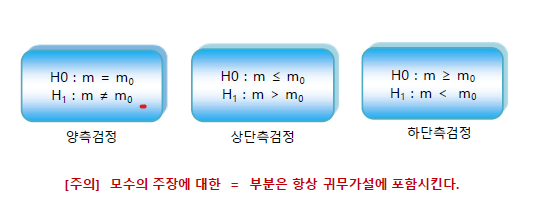

### 오류의 종류
* 검정 결과를 모집단에 대한 것으로 일반화할 경우의 오류

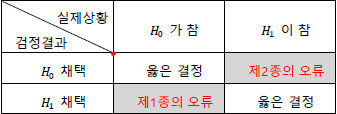

* 제 1종 오류: 귀무가설H0가 옳은데도 불구하고 대립가설을 채택하게 되는 오류(H0를 기각하게 되는 오류)
* 제 2종 오류: 귀무가설H0가 옳지 않은데도 불구하고 H0를 채택하는 오류

* 가설검정에서는 모든 오류가 작을수록 좋지만 모두 다 줄일 수 없는 관계에 있음
* 일반적으로 제 1종오류를 더 중요시 생각하고 제 1종 오류를 범할 확률의 최대 허용치를 미리 지정하고 검정

### 유의수준(signification level)
* 제 1종 오류를 범할 확률의 최대 허용치
* 통상 a = 0.05나 0.01까지 선택함. 즉 5%, 1%, 10%
* a = 0.05의 의미는 100번 검정 중 5번은 제 1종의 오류를 범한다는 의미

### 검정력(power of test)
* 제 2종 오류를 1에서 빼준 값
* 1 - b는 틀린 귀무가설을 기각하여 귀무가설의 잘못을 찾아내는 확률
* 검정력은 모수의 값에 따라 달라지는데, 이 함수의 값이 클수록 좋은 검정

### 검정통계량(test statistic)
* 관찰된 표본으로부터 구하는 통계량으로 검정 시 가설의 진위를 판단하는 기준

### 기각역(Critical Region)
* 검정통계량의 분포에서 유의수준a의 크기에 해당하는 영역
* 계산된 검정통계량의 유의성을 판정하는 기준
* 채택(accept): H0이 타당하여 H0을 선택하는 경우, 귀무가설 H0을 채택한다 함
* 기각(reject): 대립가설 H1이 타당하여 H0이 거짓인 경우, 귀무가설 H0을 기각한다 함
* 임계값(critical value): 귀무가설을 기각시키거나 채택하는 범위를 구분하는 경계값

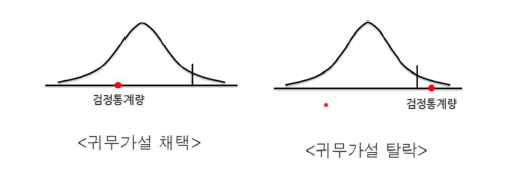

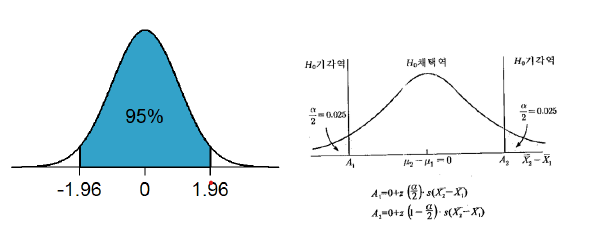

### 유의확률(significance probability)
* 관측치에 의해 귀무가설을 기각시킬 수 있는 검정법들의 유의수준 a가운데 가장 작은 최소값<br>
(흔히 유의확률을 p-value라 하고 유의수준 a보다 작으면 귀무가설을 기각하게 됨)
* 양측검정인지 단측검정(우측 또는 좌측)인지 유의

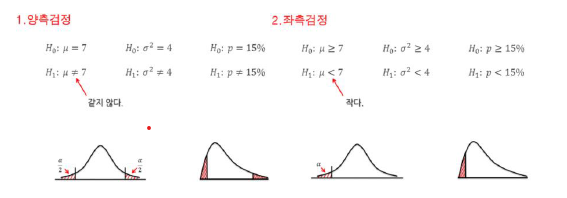

### 가설검정 절차
* 통계분석에서는 언제나 통계값에 대해 p값을 확ㅇ니하여 유의미한지 확인해야 함
* 예를 들어 상관관계가 0.7이라고 하여 실제로 상관관계가 있다고 보는 것이 아니라 P값을 확인해보고 무엇이 문제인지 확인해봐야 하는 것

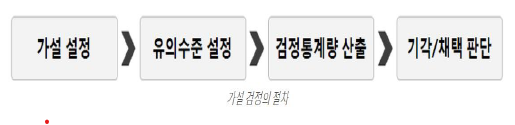

## 선형회귀분석(Linear Regression)

* 하나 혹은 그 이상의 독립변수들이 종속변수에 미치는 영향을 추정하는 통계기법
* 변수들의 관련성을 규명하기 위해 어떤 수학적 모형을 가정하여, 이 모형을 측정된 변수들의 데이터들로부터 추정하는 통계적 방법. 독립변수의 값에 의하여 종속변수의 값을 예측하기 위함

### 회귀분석의 변수
* 영향을 받는 변수(Y): 반응변수(response variable), 종속변수(dependent variable), 결과변수(outcome variable)
* 영향을 주는 변수(X): 설명변수(explanatory variable), 독립변수(independent variable), 예측변수(predictor variable)

### 단순 선형 회귀분석 정의
* 한 개의 종속변수와 한 개의 독립변수 간의 관계를 직선으로 표현하여 분석하는 방법

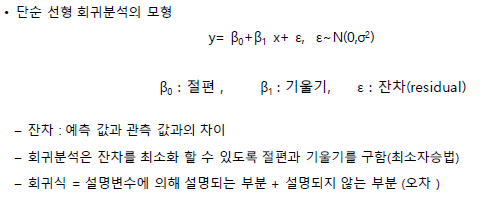

* 잔차: 예측 값과 관측 값과의 차이

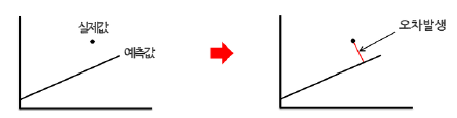

* 회귀분석은 잔차를 최소화 할 수 있도록 절편과 기울기를 구함(최소자승법)
* 여러 잔차들이 최소가 되도록 하는 직선을 최소자승법을 이용해 찾음

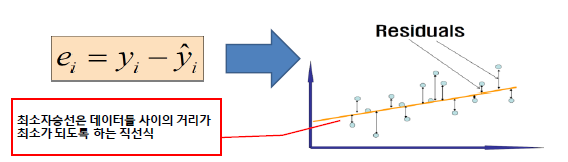

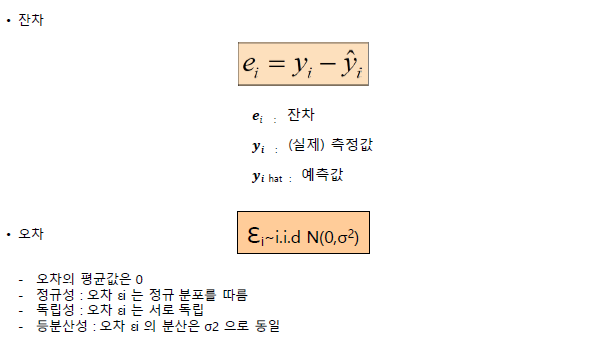

## 가우스 마코프 정리: Gauss-Markov Theorem

* 오차변수의 기댓값은 0이다.
* 오차변수와 독립변수의 공분산은 0이다.
* 오차변수의 분산은 일정한 상수이다.
* 오차변수들 사이의 공분산은 0이다.
* 오차변수는 정규분포를 따른다. <MVUE가 되기 위한 조건>
* 이 조건을 만족할 때 최적의 해를 가진다.

## 잔차에 대한 가정

#### 단순선형 회귀분석을 사용하기 위해 잔차가 갖추어야할 네 가지 조건
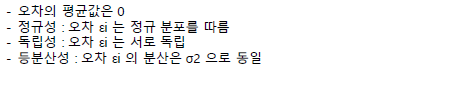

* 네 가지 조건을 만족해야 비로소 최소자승선은 예측치로 사용 가능
* 네 가지 조건을 만족했을 때 BLUE(Best Linear Unbiased Estimator)라고 한다.
* 네 가지 조건 외에 오차변수가 정규분포를 따른다면 MVUE(Minimum Variance Unbiased Estimator)라고 부른다.<br>
-> 가우스 마코프 정리(Gauss-Markov Theorem)

### 

## 문제 6

In [47]:
# =============================================================================
# 구분자 : comma(“,”), 4,323 Rows, 19 Columns, UTF-8 인코딩

# 주택 관련 정보를 바탕으로 주택 가격을 예측해 보고자 한다. 
# 다음은 확보한 주택 관련 데이터로 총 19개 컬럼으로 구성되어
# 있다.

# 컬 럼 / 정 의 / Type
# id / 매물 번호 / Double
# date / 날짜 / String
# price / 거래 가격 / Double
# bedrooms / 방 개수 / Double
# bathrooms / 화장실 개수 (화장실은 있으나 샤워기 없는 경우 0.5로 처리) / Double
# sqft_living / 건축물 면적 / Double
# sqft_lot / 대지 면적 / Double
# floors / 건축물의 층수 / Double
# waterfront / 강변 조망 가능 여부 (0 / 1) / Double
# view / 경관 (나쁨에서 좋음으로 0 ~ 4로 표시) / Double
# condition / 관리 상태 (나쁨에서 좋음으로 1 ~ 5로 표시) / Double
# grade / 등급 (낮음에서 높음으로 1 ~ 13으로 표시) / Double
# sqft_above / 지상 면적 / Double
# sqft_basement / 지하실 면적 / Double
# yr_built / 건축 연도 / Double
# yr_renovated / 개축 연도 / Double
# zipcode / 우편번호 / Double
# sqft_living15 / 15개의 인근 주택의 평균 건물 면적 / Double
# sqft_lot15 / 15개의 인근 주택의 평균 대지 면적 / Double
# =============================================================================
# =============================================================================

In [48]:
# 패키지 호출
import pandas as pd
import numpy as np

In [49]:
# 데이터 불러오기
csvFile = 'C:/Users/chunc/Desktop/Bootcamp/python/python/ProDs/Dataset/DataSet_06.csv'
data6 = pd.read_csv(csvFile)
data6.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,sqft_living15,sqft_lot15
0,2597000006,20150309T000000,347500.0,3,1.50,1180,8353,1.0,0,0,3,7,1180,0,1960,0,98155,1710,8748
1,8813400345,20150414T000000,575000.0,2,1.00,980,3663,1.0,0,0,5,7,980,0,1909,0,98105,1620,3706
2,226059106,20150102T000000,489500.0,3,1.75,2090,65558,1.0,0,0,3,8,1330,760,1977,0,98072,2450,47178
3,8645500270,20141028T000000,246000.0,4,1.75,1720,7455,1.0,0,0,4,7,1020,700,1963,0,98058,1720,7700
4,7010700550,20141114T000000,595000.0,3,2.50,2030,5100,2.0,0,0,3,7,2030,0,2008,0,98199,1790,4380


In [50]:
data6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4323 entries, 0 to 4322
Data columns (total 19 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             4323 non-null   int64  
 1   date           4323 non-null   object 
 2   price          4323 non-null   float64
 3   bedrooms       4323 non-null   int64  
 4   bathrooms      4323 non-null   float64
 5   sqft_living    4323 non-null   int64  
 6   sqft_lot       4323 non-null   int64  
 7   floors         4323 non-null   float64
 8   waterfront     4323 non-null   int64  
 9   view           4323 non-null   int64  
 10  condition      4323 non-null   int64  
 11  grade          4323 non-null   int64  
 12  sqft_above     4323 non-null   int64  
 13  sqft_basement  4323 non-null   int64  
 14  yr_built       4323 non-null   int64  
 15  yr_renovated   4323 non-null   int64  
 16  zipcode        4323 non-null   int64  
 17  sqft_living15  4323 non-null   int64  
 18  sqft_lot

In [51]:
# =============================================================================
# 1.강변 조망이 가능한지 여부(waterfront)에 따라 평균 주택 가격을 계산하고 조망이
# 가능한 경우와 그렇지 않은 경우의 평균 가격 차이의 절대값을 구하시오. 답은
# 소수점 이하는 버리고 정수부만 기술하시오. (답안 예시) 1234567
# =============================================================================

In [52]:
# 강변 조망의 여부에 따라 평균주택 가격 도출
q6_1_0 = data6[data6.waterfront == 0]['price'].mean()
q6_1_1 = data6[data6.waterfront == 1]['price'].mean()

In [53]:
# 평균가격 차이의 절대값
np.trunc(abs(q6_1_0 - q6_1_1))

1167272.0

In [54]:
# =============================================================================
# 2.price, bedrooms, bathrooms, sqft_living, sqft_lot, floors, yr_built 등 7개의 변수 간의
# 상관분석을 수행하고 price와의 상관계수의 절대값이 가장 큰 변수와 가장 작은
# 변수를 차례로 기술하시오. (답안 예시) view, zipcode
# 
# =============================================================================

In [55]:
var_list = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'yr_built']

In [56]:
# 상관계수
q6_2 = data6[var_list].corr()['price'].drop('price')
q6_2

bedrooms       0.279824
bathrooms      0.534277
sqft_living    0.709157
sqft_lot       0.106341
floors         0.270423
yr_built       0.059895
Name: price, dtype: float64

In [57]:
# price와의 상관계수의 절대값이 가장 큰 변수와 가장 작은 변수
q6_2.abs().idxmax(), q6_2.abs().idxmin()

('sqft_living', 'yr_built')

In [58]:
# =============================================================================
# 3. id, date, 그리고 zipcode를 제외한 모든 변수를 독립변수로, price를 종속변수로 하여
# 회귀분석을 수행하시오. 통계적 유의성을 갖지 못하는 독립변수를 제거하면 회귀
# 모형에 남는 변수는 모두
# 몇 개인가? 이 때 음의 회귀계수를 가지는 변수는 몇 개인가? (답안 예시) 5, 3
# =============================================================================

# =============================================================================
# (참고)
# import pandas as pd
# import numpy as np
# from sklearn.linear_model import LinearRegression
# from statsmodels.formula.api import ols
# =============================================================================

In [59]:
# statsmodel
# 패키지 불러오기
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.formula.api import ols

* lm = ols(식, 데이터셋).fit()
* 식 'y~x1+x2+x3'
* 상수항을 미포함하고 싶다면 식의 마지막에 -1을 추가한다
* C(): 범주형 변수 선언, 범주형 변수가 입력으로 삽입되면 자동으로 범주형 변수들이 더미변수로 변경

In [60]:
var_list = data6.columns.drop(['id', 'date', 'zipcode'])

In [61]:
var_list2 = data6.columns.drop(['id', 'date', 'zipcode', 'price'])
var_list2

Index(['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'waterfront', 'view', 'condition', 'grade', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

In [62]:
'price~' + 'bedrooms+bathrooms'

'price~bedrooms+bathrooms'

In [63]:
# join을 사용하게 되면 var_list2에 있는 변수목록이 문자열 연산을 통해 출력이 된다
'+'.join(var_list2)

'bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [64]:
form1 = 'price~' + '+'.join(var_list2)
form1

'price~bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above+sqft_basement+yr_built+yr_renovated+sqft_living15+sqft_lot15'

In [65]:
# ols메서드를 사용한 회귀분석
lm1 = ols(form1, data6).fit()

In [66]:
# price값 출력
lm1.predict(data6)

0       303167.404363
1       494555.779137
2       526394.280931
3       381742.870130
4       326405.856590
            ...      
4318    218820.959470
4319    700129.403303
4320    403050.034203
4321    530431.529542
4322    462692.590490
Length: 4323, dtype: float64

In [67]:
# 회귀분석의 요약정보 확인
lm1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     656.0
Date:                Thu, 08 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:58:45   Log-Likelihood:                -58960.
No. Observations:                4323   AIC:                         1.180e+05
Df Residuals:                    4308   BIC:                         1.180e+05
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept      6.302e+06   2.95e+05     21.401      0.000    5.73e+06    6.88e+06
bedrooms        -2.5e+04   3680.510     -6.791      0.000   -3.22e+04   -1.78e+04
bathrooms      5.179e+04   7163.408      7.230      0.000    3.77e+04    6.58e+04
sqft_living      92.3081      5.074     18.192      0.000      82.360     102.256
sqft_lot          0.0054      0.093      0.059      0.953      -0.176       0.187
floors         3.748e+04   8141.392      4.604      0.000    2.15e+04    5.34e+04
waterfront     6.277e+05   3.91e+04     16.064      0.000    5.51e+05    7.04e+05
view            4.04e+04   4797.344      8.421      0.000     3.1e+04    4.98e+04
condition      1.571e+04   5317.387      2.954      0.003    5280.918    2.61e+04
grade          1.306e+05   4700.604     27.789      0.000    1.21e+05     1.4e+05
sqft_above       33.7358      4.981      6.773      0.000      23.971      43.501
sqft_basement    58.5722      5.840     10.030      0.000      47.123      70.021
yr_built      -3666.8957    150.805    -24.316      0.000   -3962.551   -3371.241
yr_renovated     17.7032      8.265      2.142      0.032       1.499      33.908
sqft_living15    23.0114      7.561      3.044      0.002       8.188      37.834
sqft_lot15       -0.2323      0.142     -1.637      0.102      -0.511       0.046
==============================================================================
Omnibus:                     2170.721   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            38362.875
Skew:                           1.971   Prob(JB):                         0.00
Kurtosis:                      17.051   Cond. No.                     1.11e+17
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 1.31e-21. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""